<a href="https://colab.research.google.com/github/Dany511/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction </u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.


## <b> Introduction </b>

### Email marketing is a type of direct marketing that uses personalized emails to educate your email list about your product or services. An email marketing campaign is a scheduled series of emails used to nurture leads and current customers with the purpose of encouraging engagement and increasing sales. Each individual email leads to a specific call-to-action, i.e. getting users to sign up, book a call, continue reading, or add a product to their cart.

### Email marketing involves segmenting your target audience based on their likes and preferences to share personalized content with them. This makes them feel valued and important through personalized subject content like subject lines. Through email marketing, you will be able to increase your conversion rate. Over 65% of email users have shared that they have made a purchase through email through their phones or desktop as they found that the message was compelling. 

### In this problem statement, we will be trying to create machine learning models that characterize and track whether the mail is ignored, read or acknowledged by the reader.

### So let's begin!

## **Import Libraries**

In [1]:
#Importing all the necessary libraries
import pandas as pd 
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing VIF(variance infalation factor) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# Importing Grid Search and Randomized search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Importing Metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score,f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [2]:
# Loading the dataset using pandas read_csv.
data=pd.read_csv("/content/data_email_campaign.csv")
# .head() function gives the preview of the data
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [3]:
# Data shape
data.shape

(68353, 12)

In [4]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### There are 5 Numerical and 6 Categorical variables in the dataset

In [5]:
# Copying the dataset to a dataframe named df.
df=data.copy()

In [6]:
# Dropping the 'Email_ID' column because it is not useful in model building
df=df.drop("Email_ID",axis=1)

In [7]:
# Descriptive summary of the dataset
df.describe(include='all')

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


# **EDA**

### Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

## **Data Cleaning**

## Check for Null values

### A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [8]:
# Checking for Null values in the dataframe
df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

### We have Null values present in these columns 
### • Customer_Location
### • Total_Past_Communications
### • Total_Links
### • Total_Images

## **Univariate Analysis**

### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

In [9]:
# Create a list of all the numerical features in the dataset.
numerical_columns=["Word_Count","Total_Past_Communications","Total_Links","Total_Images","Subject_Hotness_Score"]

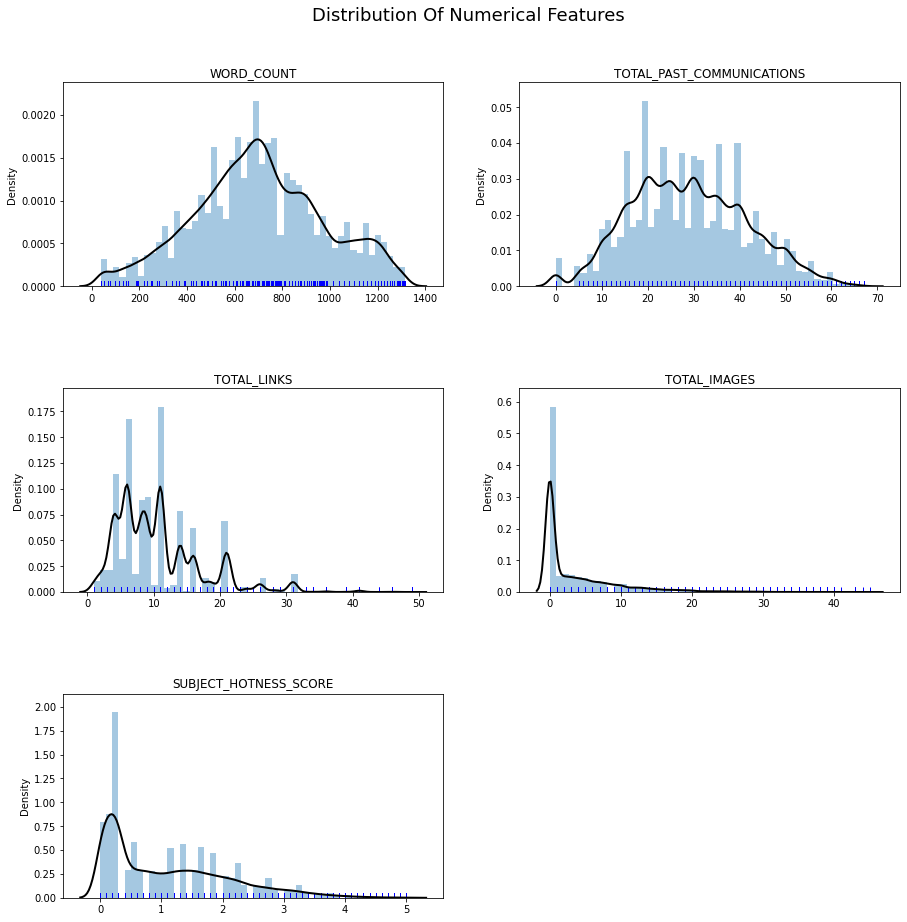

In [10]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
axs[2][1].set_visible(False) # Ignore the last subplot beacause we dont need it
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95) # Define a title to the plot

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

### We observe that the distribution of Total_Past_Communications and Word_Count follows Normal distribution. So it is fine to the use mean to fill up the Null values in 'Total_Past_Communications' column.

### Rest of the features were highly skewed on the right. Mode is robust to outliers so we use mode to fill up the missing values in Total_Links and Total_Images columns. 

## **Imputing Missing Values**

In [11]:
# Filling the null values with the mean of the column
df['Total_Past_Communications']=df["Total_Past_Communications"].fillna(df['Total_Past_Communications'].mean())

In [12]:
# Filling the null values with the mode of the column 
df['Total_Links']=df["Total_Links"].fillna(df['Total_Links'].mode()[0])
df['Total_Images']=df["Total_Images"].fillna(df['Total_Images'].mode()[0])

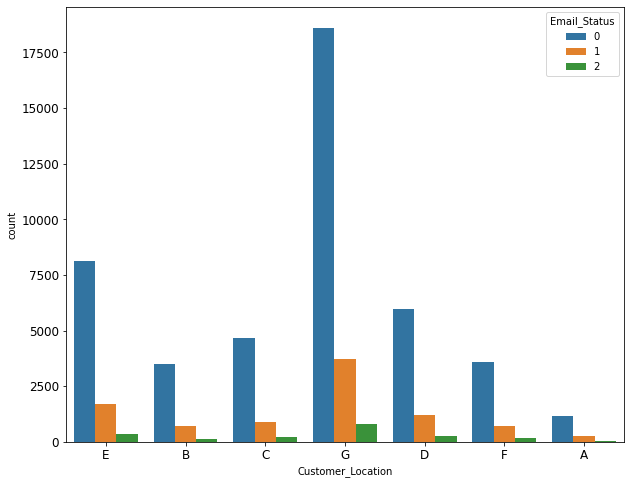

In [13]:
# Plot of frequency of Email status per each customer locatiion 
plt.figure(figsize=(10,8)) # define figure size
plt.ylabel("Frequency of Email Status")
ax=sns.countplot(df['Customer_Location'],hue=df['Email_Status']) # Using seaborn's countplot for visualization
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


### After observing the frequency graph of different values of  Customer_location with respect to the Email_status category, we found that the customer location has nothing to do with Email_Status. we came to a conclusion that the email being Ignored, Read or Acknowledged is the same irrespective of the location.

### So we drop Customer_Location feature

In [14]:
# Dropping the Customer_Location column
df=df.drop('Customer_Location',axis=1)

## **Correlation Heat Map**

### Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

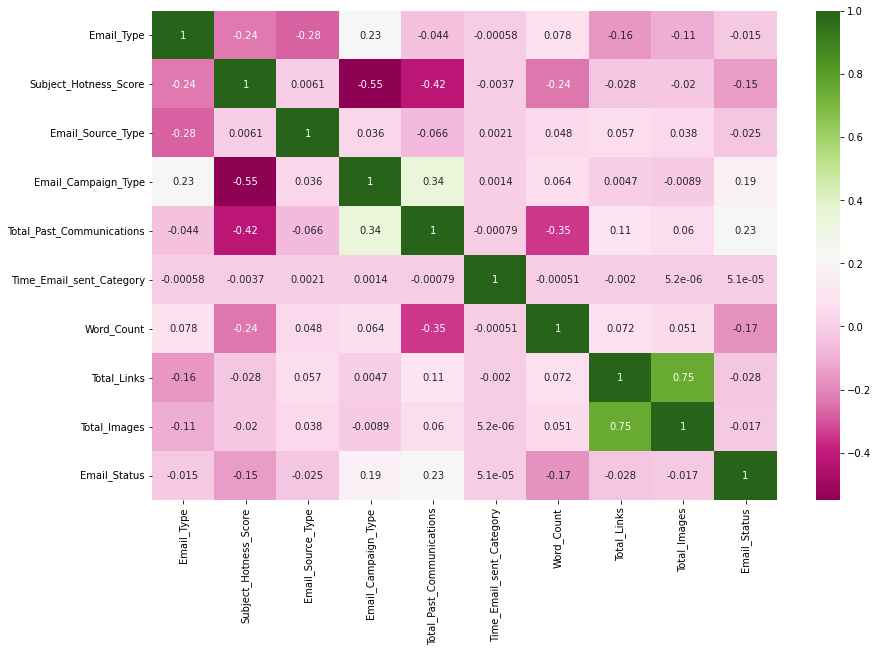

In [15]:
#Correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='PiYG', annot=True) # using seaborn's heatmap for visualization
plt.show()

### we can observe that the correlation between Total_Links and Total_Images is 0.75 (high correlation)

### Email Campaign Type and word count shows positive correlation with emails being read and acknowledged.

### Email_type and Subject Hotness score are the most negatives amongst other.

## **Bivariate Analysis**

### Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.

In [16]:
# Create a list of all the categorical features in the dataset
categorical_columns=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

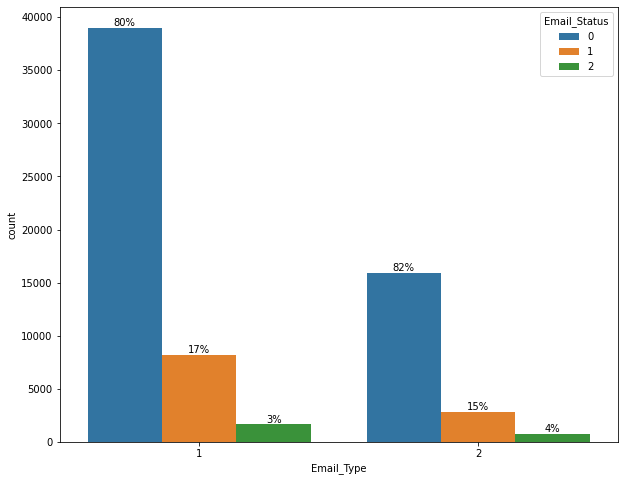

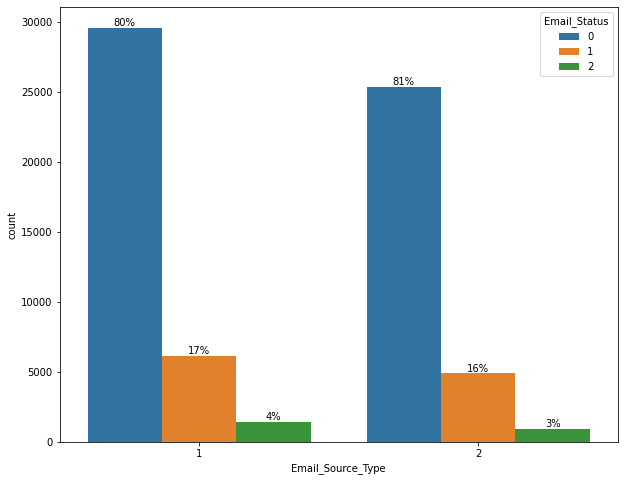

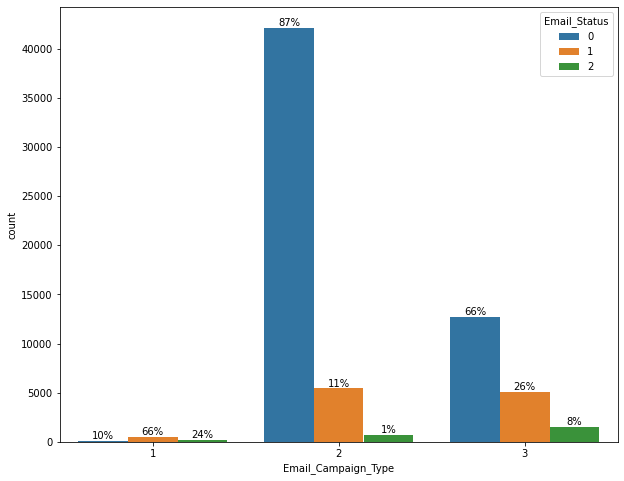

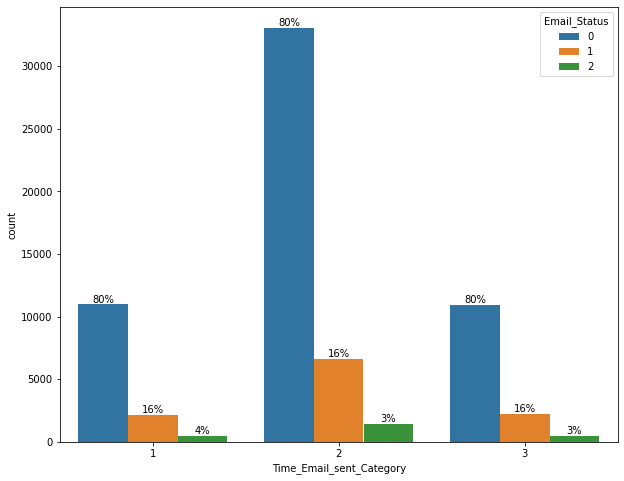

In [17]:
# loop through numerical_columns and axes  
for i,col in enumerate(categorical_columns):
  plt.figure(figsize=(10,8))
  ax=sns.countplot(x=df[col], hue=df["Email_Status"]) # using seaborn's countplot for visualization
  unique = len([x for x in df[col].unique() if x==x])
  bars = ax.patches
  # Iterate through the unique list
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()
    

### • The emails of type 1 are sent more than the email type 2. But the proportion of ignored, read and acknowledged mails are same for both email types 

### • Both the email source types have similar proportion of ignored, read and acknowledge mails. This shows that the email source type has nothing to do with email status

### • In the Email campaign type feature, eventhough the number of email sent through campaign type 1 are very few they have a high possibility of getting read. Most emails were sent from campaign type 2 and 80% of them are ignored. Seems like campaign 3 was a success beacuse even when less number of emails were sent under campaign 3, more emails were read and acknowledged.


### • From the last graph above we infer that our target variable, i.e.Email_Status does not depend upon Time_Email_sent_catagory.

## **Outlier Detection**

### Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

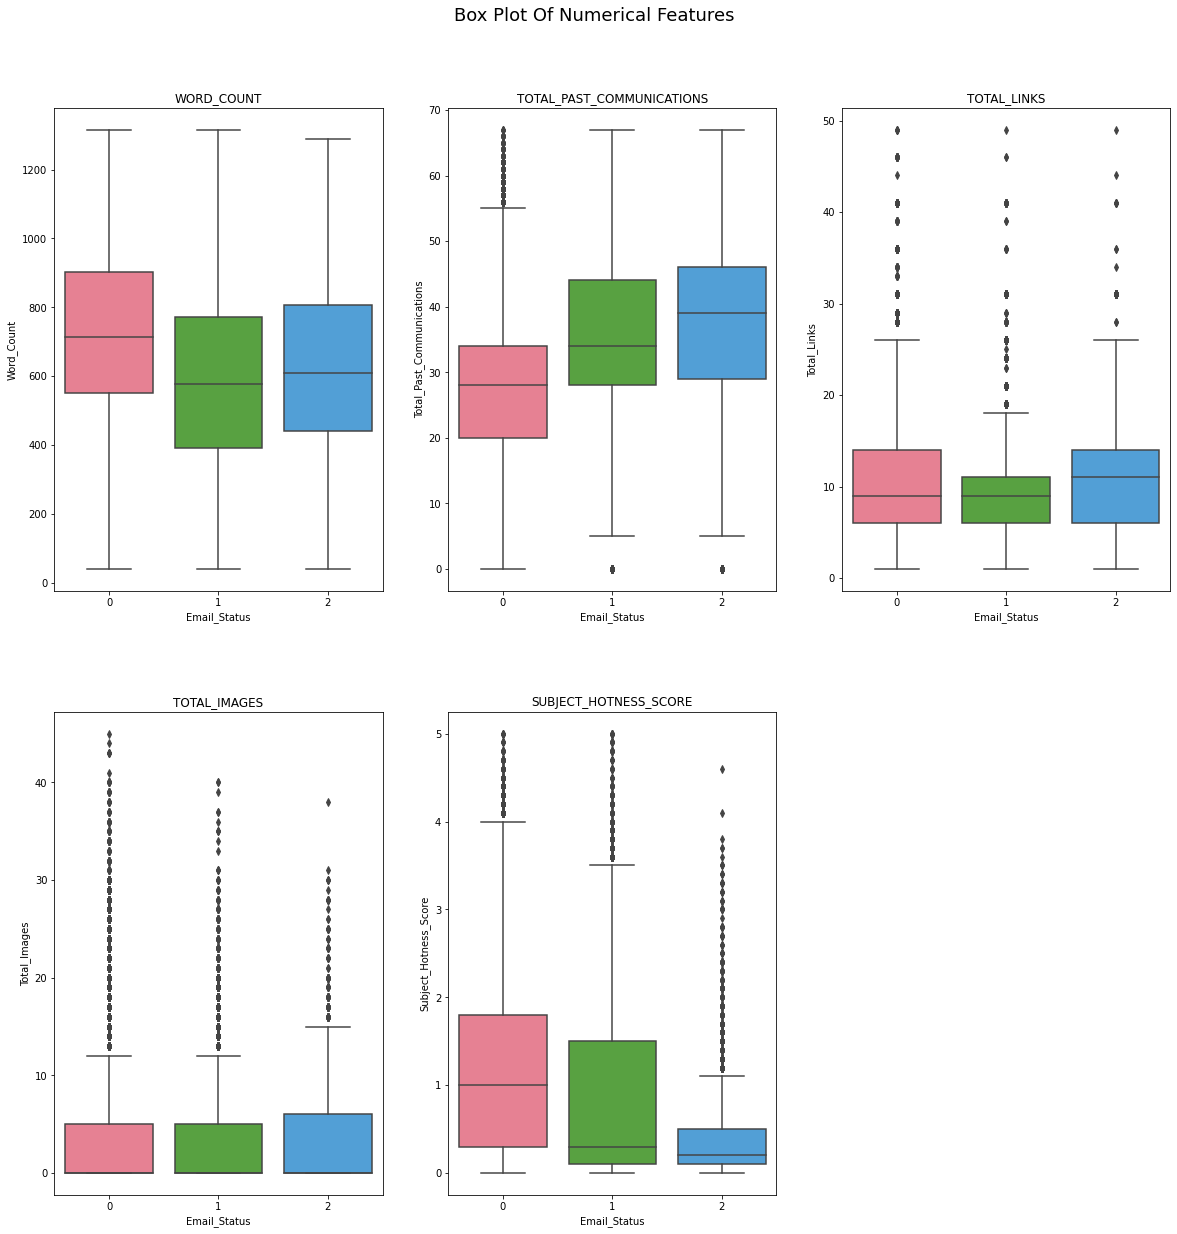

In [18]:
# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20)) # Creating subplots
plt.subplots_adjust(hspace=0.25) # Adjusting hoprizontal space
fig.suptitle("Box Plot Of Numerical Features", fontsize=18, y=0.95)
axs[1][2].set_visible(False) # Make the last subplot as invincible

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.boxplot(x=df['Email_Status'],y=df[col],ax=ax,palette="husl")

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("Email_Status")

plt.show()

### • As the word_count increases beyond 600, we can see that there is high possibilty of email being ignored. The more the words in a email,the more it has a tendency to ignored. 
### • In the Total_Past_Coomunications, median of ignored emails was around 28 with a few outliers. Analyzing Total_Past_Communications, we can see that the increase in the total past communications increases the chance of email being read or acknowledged.This is just about making connection with your customers.
### • The median is almost same in all of the three cases in total links feature with a number of outliers.
### • We can see that increase in Total Images increases the chance of email being ignored.
### • In the Subject_Hotness_Score, median of ignored emails was around 1 with a few outliers and the median for read and acknowledged email are much lower which is around 0.2 to 0.5

## **Multicollinearity and Feature Selection**

### Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

### We can quantify multicollinearity using Variance Inflation Factors (VIF)

### VIF = 1/(1-R^2) The more the value of R^2 is closer to 1 the more, VIF score tends to infinity. VIF starts with 1 and denotes that the variable has no correlation at all. VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

In [19]:
# Function to calculate the vif values
def vif_calc(df):
  vif = pd.DataFrame() # creating a empty dataframe to store the vif values
  vif["features"] = df.columns # copying feature names from df.columns list to Vif dataframe
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] #calculating vif values for each feature
  return(vif)

In [20]:
#let's get the VIF scores
# Create a list of all the categorical features in the dataset
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]]) # Using the vif_calc function to calculate the vif values
vif_df

,features,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


### We can see that the VIF of Total_Links is greater than 5. Previously in the correlation heatmap we have seen that there is high correlation between Total_Links and Total_Images with a score of 0.75. So in order to avoid multicollinearity loss We can try combining both of these or deleting one of these.

In [21]:
# we try combining both the Total_Images and Total_Links
df['Links_Images']=df['Total_Images']+df['Total_Links'] # Adding Total_images and Total_links and creating a new column for the sum
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1) # drop the old columns 

In [22]:
# Calculating vif to check for higher vif values
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,features,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


## **Handling Outliers**

In [23]:
# Removing unwanted features from Numerical columns list
numerical_columns.append("Links_Images")
numerical_columns.remove("Word_Count")
numerical_columns.remove('Total_Links')
numerical_columns.remove('Total_Images')

In [24]:
print(numerical_columns)

['Total_Past_Communications', 'Subject_Hotness_Score', 'Links_Images']


In [25]:
# Let's check the number of outliers in different features w.r.t Email_Status
outliers = {}
for col in numerical_columns:
  q_75, q_25 = np.percentile(df.loc[:,col],[75,25])
  IQR = q_75-q_25 # Calculate Inter quartile range
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[col] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[col] > max]['Email_Status'].tolist()) 
  outliers[col]={}
  for i in outlier_list[0]:
      outliers[col][i] = outliers[col].get(i,0) + 1
print(outliers)

{'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


### We have calculated the number of outliers with respect to individual classes of Email_Status. The minority class in our target variable is 1 and 2. so before deleting te outliers we should check that we aren't deleting more than 5% of useful information from minority class. Otherwise the model cannot be able to classify the minority classes correctly.

In [26]:
# Lets check the percentage of outliers in minority and majority class
minority_outliers = 0  
majority_outliers = 0
# Iterating through each numerical column
for col in numerical_columns:
  # summing up the number of outliers
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

# Summing up the minority and majority outliers
total_minority = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_majority = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_minority)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_majority)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_minority+total_majority))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


In [27]:
#deleting majority outliers
for col in numerical_columns:
  q_low = df[col].quantile(0.01) # calculating the value at 0.01 quantile 
  q_hi  = df[col].quantile(0.99) # calculating the value at 0.01 quantile 
  df = df.drop(df[(df[col] > q_hi) &  (df['Email_Status']==0)].index) # drop the values which are smaller than the lower limit
  df = df.drop(df[(df[col] < q_low) & (df['Email_Status']==0)].index) # drop the values which are larger than the upper limit

### Since we have more than 5% ouliers in minority section. we decide not to delete them.

## **Encoding Categorical Variables**

### One Hot Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [28]:
#Creating a list of categorical features needed for encoding
Categorical_features=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

In [29]:
#creating dummy variables
df = pd.get_dummies(df,columns=Categorical_features)
# As some columns are binary encoded we can drop either one of the columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,0,8.0,1,0,0,1,0,1,0,0


## **Data Modelling**

In [30]:
# Selecting appropriate features for model building
selected_features=['Email_Type_1', 'Subject_Hotness_Score', 'Email_Source_Type_1','Email_Campaign_Type_1','Email_Campaign_Type_2','Email_Campaign_Type_3', 'Total_Past_Communications',
        'Word_Count','Links_Images','Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']

In [31]:
# creating a Dataframe named X for all independent features 
x=df[selected_features]

In [32]:
x.head()

,Email_Type_1,Subject_Hotness_Score,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Total_Past_Communications,Word_Count,Links_Images,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1,2.2,0,0,1,0,33.0,440,8.0,1,0,0
1,0,2.1,1,0,1,0,15.0,504,5.0,0,1,0
2,0,0.1,1,0,0,1,36.0,962,5.0,0,1,0
3,1,3.0,0,0,1,0,25.0,610,16.0,0,1,0
4,1,0.0,0,0,0,1,18.0,947,4.0,0,1,0


In [33]:
# Create a dataframe named 'y' for the Targer variable
y=df['Email_Status']

## **Normalization**

### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

In [34]:
# Importing Standardscaler and MinMaxScaler from sklearn library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [35]:
# Creating an instance of MinMaxScaler
sc=StandardScaler()
# Applying the MinMaxScaler on X dataframe 
X=sc.fit_transform(x)

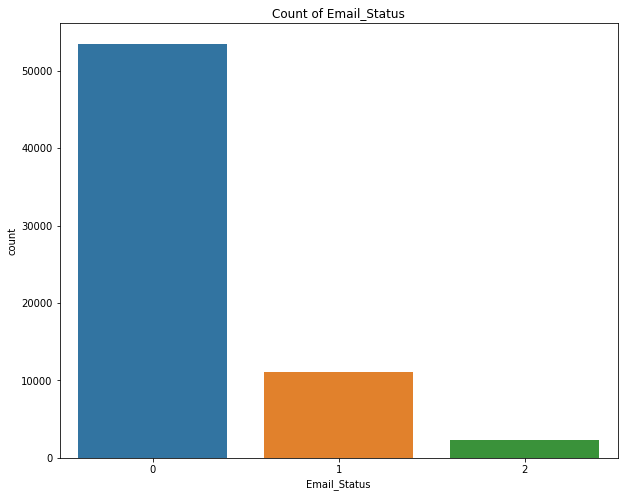

In [36]:
# Countplot of Email_Status
plt.figure(figsize=(10,8)) # define figure size
plt.title("Count of Email_Status") # give a title
sns.countplot(df['Email_Status'])
plt.show()

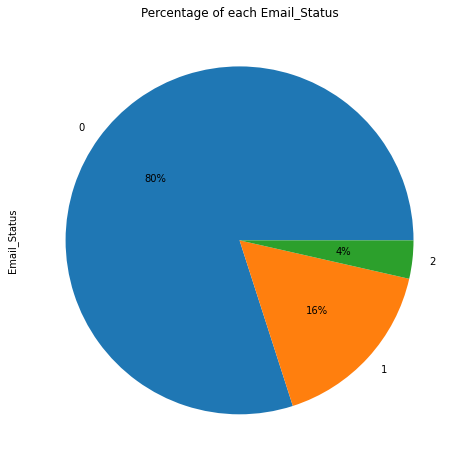

In [37]:
# Pie plot
plt.figure(figsize=(10,8)) #define figure size
plt.title("Percentage of each Email_Status") # give a title
df.groupby('Email_Status')['Email_Status'].count().plot(kind='pie',autopct='%1.0f%%') # Using groupby function and pandas pie plot for visualization
plt.show()

### From the above we can see that the number of mails ignored were more than number of mails read and acknowledged.This is called Class imbalance.

### In the case of class imbalance classifiers tend to make biased learning model that has a poorer predictive accuracy over the minority classes compared to the majority classes

### We can handle class imbalance using Oversampling or Undersampling

## **Train-Test Split**

In [38]:
#Importing train_test_split from sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the data into x_train,x_test,y_train and y_test 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23,stratify=y) # Stratify argument is used to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. 

In [40]:
x_train.shape

(53531, 12)

In [41]:
x_test.shape

(13383, 12)

## **Handling Class Imbalance**

### Firstly, we will use Random UnderSampling and then we check the results obtained from various models upon testing. After this we will use SMOTE technique and see which method works better for our data.

### **Random Undersampling(RUS)**  

### Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

In [42]:
#importing random under sampler from imbalance learn library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True) #Creating an instance of RandomUnderSampler
x_rus,y_rus= rus.fit_resample(x_train,y_train) #Resampling the training data

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 53531
Resampled dataset shape 5694


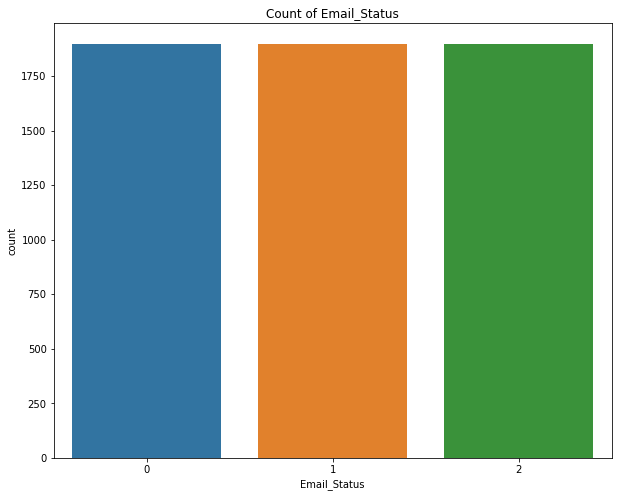

In [43]:
# Countplot of Email_Status for resampled data
plt.figure(figsize=(10,8)) # define figure size
plt.title("Count of Email_Status") # give a title
sns.countplot(y_rus)
plt.show()

## **Model Building**

In [44]:
# Import all the required classifiers and metrics from sklearn's library
from sklearn.linear_model import LogisticRegression #Importing LogisticRegression
#Importing SVM
from sklearn.svm import SVC 
#Importing Decision tree
from sklearn.tree import DecisionTreeClassifier
#Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
#Importing K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#Importing Extreme Gardient Boosting 
from xgboost import XGBClassifier
#Importing confusion_matrix, classification report ,f1 score and roc_curve metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score

In [45]:
# Make a separate list for the models and metrics which we are going to use in our analysis
model_list=[]
Accuracy_train=[]
Accuracy_test =[]
Train_recall = []
Test_recall = []
#Precision RUS
Train_precision= []
Test_precision = []
#F1 Score RUS
Train_f1 =[]
Test_f1 = []
#ROC-AUC RUS
Train_auc = []
Test_auc = []

In [46]:
# Function to plot ROC curve
def plot_roc_curve(y_test,test_proba,test_auc,model):
  #create seperate dictionaries for fpr,tpr and threshold
  fpr = {} 
  tpr = {}
  thresh ={}
  no_of_class=3 #Types of email status
  #Iterating through each class and storing the values of tpr,fpr and threshold.
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_proba[:,i], pos_label=i)
  plt.figure(figsize=(8,6))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc))
  plt.title('Multiclass ROC curve of '+ str(model))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [47]:
def evaluate(model,x_train,y_train,x_test):
  #Evaluation 

  #Making predictions for train and test data
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  
  #probabilities
  train_proba = model.predict_proba(x_train)
  test_proba = model.predict_proba(x_test)

  #Accuracy 
  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)

  #Confusion Matrix 
  cm_train = confusion_matrix(y_train,y_pred_train)
  cm_test = confusion_matrix(y_test,y_pred_test)

  #Recall 
  train_recall = recall_score(y_train,y_pred_train, average='weighted')
  test_recall = recall_score(y_test,y_pred_test, average='weighted')

  #Precision 
  train_precision = precision_score(y_train,y_pred_train, average='weighted')
  test_precision = precision_score(y_test,y_pred_test, average='weighted')

  #F1 Score 
  train_f1 = f1_score(y_train,y_pred_train, average='weighted')
  test_f1 = f1_score(y_test,y_pred_test, average='weighted')

  #ROC-AUC 
  train_auc = roc_auc_score(y_train,train_proba,average='weighted',multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results 
  print("----- Evaluation on "+ str(model).split('(')[0] + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  cm_test = confusion_matrix(y_test,y_pred_test)
  print(cm_test)
  print("\n")
  print("Classification Report \n")
  print(classification_report(y_test,y_pred_test))
  print("\n")

  # Plotting Roc_auc curve
  print("ROC Curve \n")
  plot_roc_curve(y_test,test_proba,test_auc,model)
  print("\n")

  #Append metrics to their respective lists
  print("--------------Results ---------------\n")
  print("Training Accuracy: ", accuracy_train)
  Accuracy_train.append(accuracy_train)
  print("Test Accuracy: ", accuracy_test)
  Accuracy_test.append(accuracy_test)

  # Recall RUS
  print("Train Recall: ", train_recall)
  Train_recall.append(train_recall)
  print("Test Recall: ", test_recall)
  Test_recall.append(test_recall)

  #Precision RUS
  print("Train Precision: ", train_precision)
  Train_precision.append(train_precision)
  print("Test Precision: ", test_precision)
  Test_precision.append(test_precision)

  #F1 Score RUS
  print("Train F1: ", train_f1)
  Train_f1.append(train_f1)
  print("Test F1: ", test_f1)
  Test_f1.append(test_f1)

  #ROC-AUC RUS
  print("Train Auc: ", train_auc)
  Train_auc.append(train_auc)
  print("Test Auc: ", test_auc)
  Test_auc.append(test_auc)


In [48]:
# Function for Training and Evaluating the model
def train_evaluate(Model,x_train,y_train,Technique_used):
  #fitting the model
  model=Model.fit(x_train,y_train) 

  #Calling the function for evaluation
  evaluate(model,x_train,y_train,x_test)

  # Creating a list for storing the model names
  model_name=str(model).split('(')[0]+"_"+str(Technique_used)
  model_list.append(model_name)

## **SVM**

----- Evaluation on SVC------
--------------Test data ---------------

Confusion matrix 

[[7265 1546 1889]
 [ 627  542 1039]
 [  74   91  310]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     10700
           1       0.25      0.25      0.25      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.61      0.67     13383



ROC Curve 



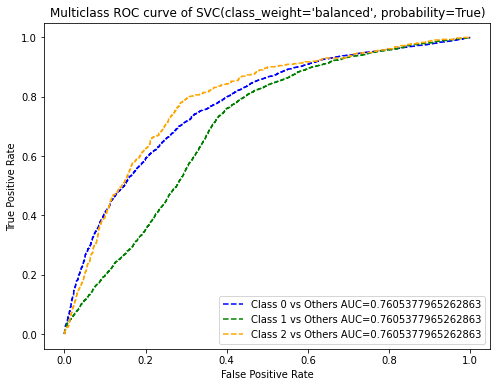



--------------Results ---------------

Training Accuracy:  0.5579557428872497
Test Accuracy:  0.606515728909811
Train Recall:  0.5579557428872497
Test Recall:  0.606515728909811
Train Precision:  0.5479051341405635
Test Precision:  0.7736008180927433
Train F1:  0.5409244512948724
Test F1:  0.6690577460073562
Train Auc:  0.7442447228757981
Test Auc:  0.7605377965262863


In [49]:
#Training and Evaluating SVM with RUS data
train_evaluate(SVC(probability =True,class_weight='balanced',gamma='scale'),x_rus,y_rus,"RUS")

## **KNN**

----- Evaluation on KNeighborsClassifier------
--------------Test data ---------------

Confusion matrix 

[[6895 2363 1442]
 [ 727  793  688]
 [ 112  166  197]]


Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     10700
           1       0.24      0.36      0.29      2208
           2       0.08      0.41      0.14       475

    accuracy                           0.59     13383
   macro avg       0.40      0.47      0.39     13383
weighted avg       0.76      0.59      0.65     13383



ROC Curve 



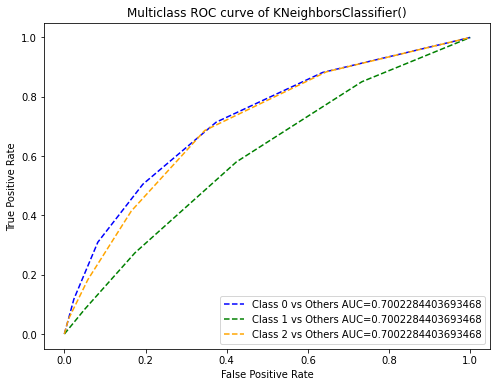



--------------Results ---------------

Training Accuracy:  0.6559536354056902
Test Accuracy:  0.589180303369947
Train Recall:  0.6559536354056902
Test Recall:  0.5891803033699469
Train Precision:  0.6555429690303632
Test Precision:  0.7551767378620869
Train F1:  0.6533420100418806
Test F1:  0.6504101049691823
Train Auc:  0.8463218358259282
Test Auc:  0.7002284403693468


In [50]:
#Training and Evaluating KNN with RUS data
train_evaluate(KNeighborsClassifier(),x_rus,y_rus,"RUS")

## **Logistic Regression**

### Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

----- Evaluation on LogisticRegression------
--------------Test data ---------------

Confusion matrix 

[[7370 1508 1822]
 [ 635  537 1036]
 [  88   69  318]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.69      0.78     10700
           1       0.25      0.24      0.25      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.61      0.67     13383



ROC Curve 



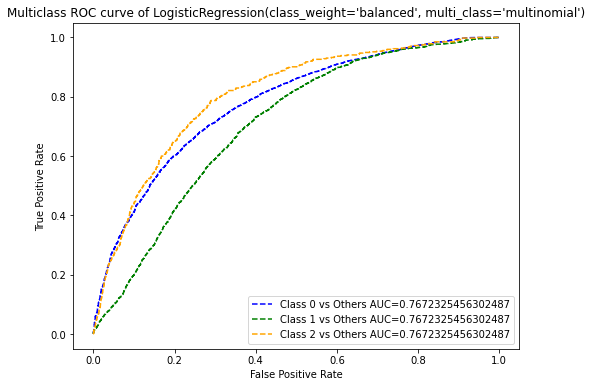



--------------Results ---------------

Training Accuracy:  0.5426765015806112
Test Accuracy:  0.6145856683852648
Train Recall:  0.5426765015806112
Test Recall:  0.6145856683852648
Train Precision:  0.5291139320708222
Test Precision:  0.7735588148789915
Train F1:  0.5200423215292821
Test F1:  0.6742736240191519
Train Auc:  0.7282966689281194
Test Auc:  0.7672325456302487


In [51]:
#Training and Evaluating Logistic regression using RUS data
train_evaluate(LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs'),x_rus,y_rus,"RUS") 

## **Decision Tree**

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[5687 2736 2277]
 [ 617  729  862]
 [ 100  151  224]]


Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.53      0.66     10700
           1       0.20      0.33      0.25      2208
           2       0.07      0.47      0.12       475

    accuracy                           0.50     13383
   macro avg       0.39      0.44      0.34     13383
weighted avg       0.75      0.50      0.58     13383



ROC Curve 



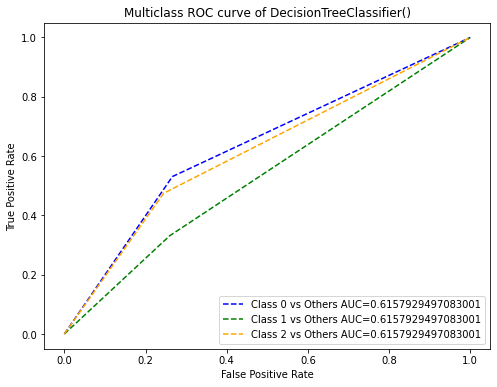



--------------Results ---------------

Training Accuracy:  0.9992975061468212
Test Accuracy:  0.49615183441679744
Train Recall:  0.9992975061468212
Test Recall:  0.4961518344167975
Train Precision:  0.9992984300919013
Test Precision:  0.7456320987088609
Train F1:  0.9992973667896925
Test F1:  0.5771205030835632
Train Auc:  0.9999993985497833
Test Auc:  0.6157929497083001


In [52]:
#Training and Evaluating Decision tree with RUS data
train_evaluate(DecisionTreeClassifier(),x_rus,y_rus,"RUS")

### Clearly, we can see that the Decision Tree is working really well with train data but not on test data. From this we can say that the decision tree is overfitting the data

## **Random Forest**

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[7693 1416 1591]
 [ 672  588  948]
 [  82   89  304]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     10700
           1       0.28      0.27      0.27      2208
           2       0.11      0.64      0.18       475

    accuracy                           0.64     13383
   macro avg       0.43      0.54      0.42     13383
weighted avg       0.78      0.64      0.69     13383



ROC Curve 



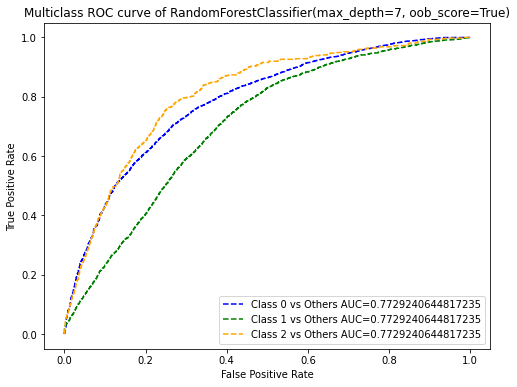



--------------Results ---------------

Training Accuracy:  0.5976466455918511
Test Accuracy:  0.641485466636778
Train Recall:  0.5976466455918511
Test Recall:  0.641485466636778
Train Precision:  0.5934612452923799
Test Precision:  0.7783001410254088
Train F1:  0.5835188443086501
Test F1:  0.694088513472775
Train Auc:  0.7968596341035967
Test Auc:  0.7729240644817235


In [53]:
#Training and Evaluating Random forest with RUS data
train_evaluate(RandomForestClassifier(max_depth=7,oob_score=True),x_rus,y_rus,"RUS")

## **XGBoost**

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[7592 1634 1474]
 [ 649  640  919]
 [  86   86  303]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10700
           1       0.27      0.29      0.28      2208
           2       0.11      0.64      0.19       475

    accuracy                           0.64     13383
   macro avg       0.43      0.55      0.42     13383
weighted avg       0.78      0.64      0.69     13383



ROC Curve 



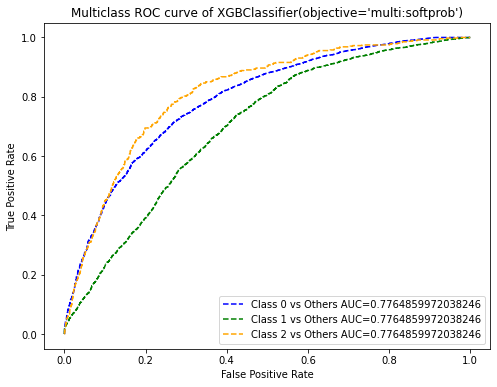



--------------Results ---------------

Training Accuracy:  0.5848261327713382
Test Accuracy:  0.6377493835462901
Train Recall:  0.5848261327713382
Test Recall:  0.6377493835462901
Train Precision:  0.5762629521705422
Test Precision:  0.7776811265796193
Train F1:  0.5718617912341732
Test F1:  0.6910509690955627
Train Auc:  0.7720441220177785
Test Auc:  0.7764859972038246


In [54]:
#Training and Evaluating Extreme gradient boost with RUS data
train_evaluate(XGBClassifier(),x_rus,y_rus,"RUS")

# **Hyperparameter Tuning RUS**

### We will use hyperparameter tuning for the Decision Tree because of Overfitting. 

### we will also tune the hyperparameters of RandomForest and Xgboost to improve the f1_score and Auc score because these are the best models we have got so far.

## **RandomizedSearchCV**

In [55]:
#Creating seperate dictionaries containing values of parameters for each model for RUS data
randomforest_params = {"n_estimators":[100,150,200],'max_depth' : [3,5,7],'min_samples_split': [3,4,5],'min_samples_leaf': [4,5,6]}
Xgboost_params = {"n_estimators":[100,150], 'max_depth' : [3,5,7],'min_samples_leaf': [2,3,4],'min_samples_split': [10,15,20] }
Decision_params= {'max_depth':[None,3,5,7],'min_samples_leaf': [4,6,8], 'min_samples_split': [6,8,10],'criterion': ["gini",'entropy']}

In [56]:
#Function for Hyperparameter tuning
# model : Classsifier, parameters: parameter grid for hyperparameter tuning, x: x_train, y: y_train, method: RandomizedSearch or GridSearch, Technique : Sampling technique used.
def tuned(model,parameters,x,y,method,Technique):
  tuned=method(model, parameters, cv=5, n_jobs=-1,scoring='f1_weighted') # Using Randomizedsearchcv with 5-fold cross validation with scoring as weighted f1 score
  print(model)
  print('\n')
  model=model.fit(x,y) # fitting the model
  tuned.fit(x,y) # fitting the model for tuning
  Model=tuned.best_estimator_  # Saving the best model which gives best F1_score value
  params=tuned.best_params_    # Saving the best parameters
  print("Best_Estimator : ",Model)
  print("Best_Parameters : ",params)
  predictions=Model.predict(x_test) 
  print("\n")
  print("Test Results ---------------------------\n")
  #Calling the train_evaluate function
  train_evaluate(Model,x,y,Technique)

DecisionTreeClassifier()


Best_Estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       min_samples_split=8)
Best_Parameters :  {'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 7, 'criterion': 'entropy'}


Test Results ---------------------------

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[6548 2534 1618]
 [ 501  772  935]
 [  72  116  287]]


Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.61      0.73     10700
           1       0.23      0.35      0.27      2208
           2       0.10      0.60      0.17       475

    accuracy                           0.57     13383
   macro avg       0.42      0.52      0.39     13383
weighted avg       0.78      0.57      0.64     13383



ROC Curve 



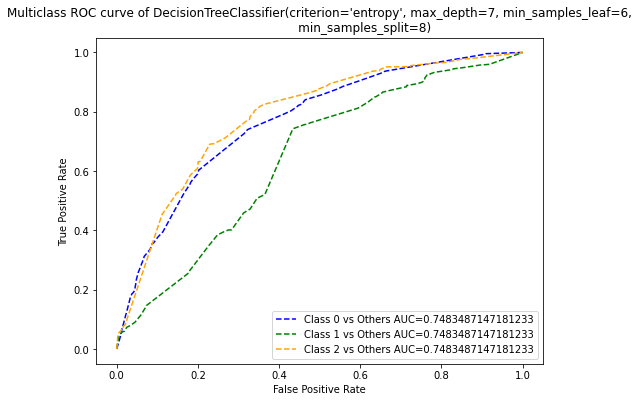



--------------Results ---------------

Training Accuracy:  0.5748155953635405
Test Accuracy:  0.5684076813868341
Train Recall:  0.5748155953635405
Test Recall:  0.5684076813868341
Train Precision:  0.5710875158819079
Test Precision:  0.7759946103723259
Train F1:  0.5711484975260116
Test F1:  0.6389313729576506
Train Auc:  0.7639387938350796
Test Auc:  0.7483487147181233


In [57]:
#Tuning and Evaluating Decision tree with RUS  data
tuned(DecisionTreeClassifier(),Decision_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

### After hyperparameter tuning, The decision tree is performing equally on train data as well as test data. From this we can say that we have avoided the problem of Overfitting.

RandomForestClassifier()


Best_Estimator :  RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=3)
Best_Parameters :  {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 7}


Test Results ---------------------------

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[7565 1557 1578]
 [ 661  601  946]
 [  81   93  301]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10700
           1       0.27      0.27      0.27      2208
           2       0.11      0.63      0.18       475

    accuracy                           0.63     13383
   macro avg       0.43      0.54      0.42     13383
weighted avg       0.78      0.63      0.69     13383



ROC Curve 



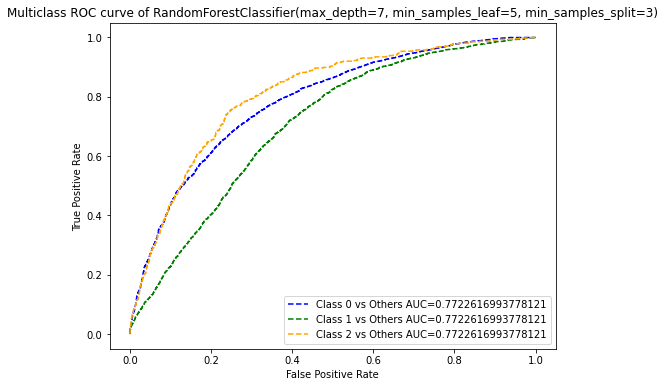



--------------Results ---------------

Training Accuracy:  0.5860554970144011
Test Accuracy:  0.6326683105432265
Train Recall:  0.5860554970144011
Test Recall:  0.6326683105432265
Train Precision:  0.579320233626894
Test Precision:  0.7759382634696792
Train F1:  0.5733368410247317
Test F1:  0.6873867416767722
Train Auc:  0.7865861704202713
Test Auc:  0.7722616993778121


In [58]:
#Tuning the parameters for Random forest using RUS data
tuned(RandomForestClassifier(),randomforest_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

XGBClassifier()


Best_Estimator :  XGBClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
              n_estimators=150, objective='multi:softprob')
Best_Parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}


Test Results ---------------------------

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[7217 1919 1564]
 [ 596  681  931]
 [  73  107  295]]


Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.67      0.78     10700
           1       0.25      0.31      0.28      2208
           2       0.11      0.62      0.18       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.41     13383
weighted avg       0.78      0.61      0.67     13383



ROC Curve 



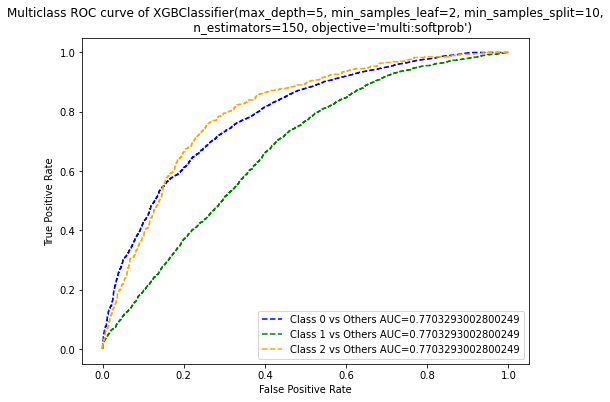



--------------Results ---------------

Training Accuracy:  0.6828240252897787
Test Accuracy:  0.6121945752073527
Train Recall:  0.6828240252897787
Test Recall:  0.6121945752073527
Train Precision:  0.6825014617702193
Test Precision:  0.7769534511102888
Train F1:  0.6782245116033501
Test F1:  0.6730464135542413
Train Auc:  0.8599382754775238
Test Auc:  0.7703293002800249


In [59]:
#Tuning the parameters for xgboost using resampled data after Randomundersampling
tuned(XGBClassifier(),Xgboost_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

In [60]:
#creating a dictionary to store all the metrics
all_metrics={'Accuracy_train' :Accuracy_train,'Accuracy_test':Accuracy_test,'Train_recall':Train_recall,'Test_recall':Test_recall,
'Train_precision':Train_precision,'Test_precision':Test_precision,'Train_f1':Train_f1,'Test_f1':Test_f1,'Train_auc':Train_auc,'Test_auc':Test_auc}

In [61]:
# Creating a funtion to create a comparision dataframe for all the models. 
def metrics_df(model_list,all_metrics):
#converting dictionary to dataframe fro easy visual
 metrics=pd.DataFrame.from_dict(all_metrics,orient='index',columns=model_list)
 metrics=metrics.T
 return metrics
#return metrics.sort_values([Test_f1,Test_auc],ascending=False) #sort the dataframe with respect to test_auc score

## **Comparision Dataframe**

In [62]:
#Calling the function metrics_df to compare the results 
metrics_df(model_list,all_metrics)

,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
SVC_RUS,0.557956,0.606516,0.557956,0.606516,0.547905,0.773601,0.540924,0.669058,0.744245,0.760538
KNeighborsClassifier_RUS,0.655954,0.589180,0.655954,0.589180,0.655543,0.755177,0.653342,0.650410,0.846322,0.700228
LogisticRegression_RUS,0.542677,0.614586,0.542677,0.614586,0.529114,0.773559,0.520042,0.674274,0.728297,0.767233
DecisionTreeClassifier_RUS,0.999298,0.496152,0.999298,0.496152,0.999298,0.745632,0.999297,0.577121,0.999999,0.615793
RandomForestClassifier_RUS,0.597647,0.641485,0.597647,0.641485,0.593461,0.778300,0.583519,0.694089,0.796860,0.772924
XGBClassifier_RUS,0.584826,0.637749,0.584826,0.637749,0.576263,0.777681,0.571862,0.691051,0.772044,0.776486
DecisionTreeClassifier_Tuned_RUS,0.574816,0.568408,0.574816,0.568408,0.571088,0.775995,0.571148,0.638931,0.763939,0.748349
RandomForestClassifier_Tuned_RUS,0.586055,0.632668,0.586055,0.632668,0.579320,0.775938,0.573337,0.687387,0.786586,0.772262
XGBClassifier_Tuned_RUS,0.682824,0.612195,0.682824,0.612195,0.682501,0.776953,0.678225,0.673046,0.859938,0.770329


### Now, we will apply SMOTE and check the results to see if there is any improvement in the f1_score and Auc score

## **SMOTE**

### SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them. 
### SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [63]:
#Importing SMOTE from imbalance learn library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 53531
Resampled dataset shape 128406


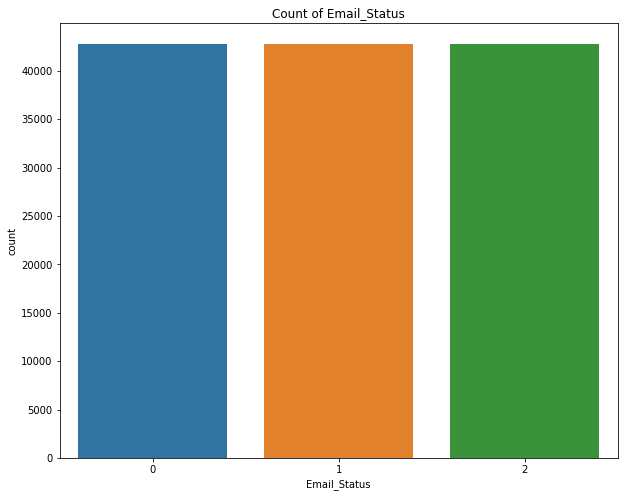

In [64]:
# Countplot of Email_Status
plt.figure(figsize=(10,8)) # define figure size
plt.title("Count of Email_Status") #giving a title to the plot
sns.countplot(y_smote)
plt.show()

----- Evaluation on KNeighborsClassifier------
--------------Test data ---------------

Confusion matrix 

[[6980 2584 1136]
 [ 794  926  488]
 [ 128  224  123]]


Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     10700
           1       0.25      0.42      0.31      2208
           2       0.07      0.26      0.11       475

    accuracy                           0.60     13383
   macro avg       0.40      0.44      0.39     13383
weighted avg       0.75      0.60      0.66     13383



ROC Curve 



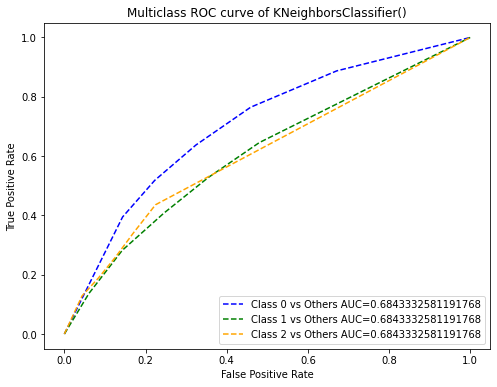



--------------Results ---------------

Training Accuracy:  0.8848574054171924
Test Accuracy:  0.5999402226705522
Train Recall:  0.8848574054171924
Test Recall:  0.5999402226705522
Train Precision:  0.8926455675889975
Test Precision:  0.7496480147048099
Train F1:  0.8824659651710305
Test F1:  0.6553587018396213
Train Auc:  0.9841643751850475
Test Auc:  0.6843332581191768


In [65]:
#Training and Evaluating KNN with Smote data
train_evaluate(KNeighborsClassifier(),x_smote,y_smote,"SMOTE")

----- Evaluation on LogisticRegression------
--------------Test data ---------------

Confusion matrix 

[[7469 1458 1773]
 [ 654  532 1022]
 [  88   65  322]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10700
           1       0.26      0.24      0.25      2208
           2       0.10      0.68      0.18       475

    accuracy                           0.62     13383
   macro avg       0.42      0.54      0.41     13383
weighted avg       0.77      0.62      0.68     13383



ROC Curve 



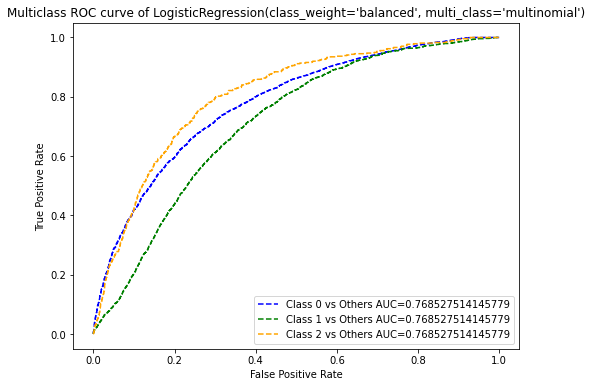



--------------Results ---------------

Training Accuracy:  0.5363534414279707
Test Accuracy:  0.6219083912426212
Train Recall:  0.5363534414279707
Test Recall:  0.6219083912426212
Train Precision:  0.5206832232320738
Test Precision:  0.7736498510202771
Train F1:  0.5115706527278304
Test F1:  0.6790927930982091
Train Auc:  0.7251347817084638
Test Auc:  0.768527514145779


In [66]:
#Training and Evaluating Logistic regression with Smote data
train_evaluate(LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs'),x_smote,y_smote,"SMOTE")

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[8544 1754  402]
 [1290  714  204]
 [ 239  174   62]]


Classification Report 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     10700
           1       0.27      0.32      0.29      2208
           2       0.09      0.13      0.11       475

    accuracy                           0.70     13383
   macro avg       0.40      0.42      0.41     13383
weighted avg       0.73      0.70      0.71     13383



ROC Curve 



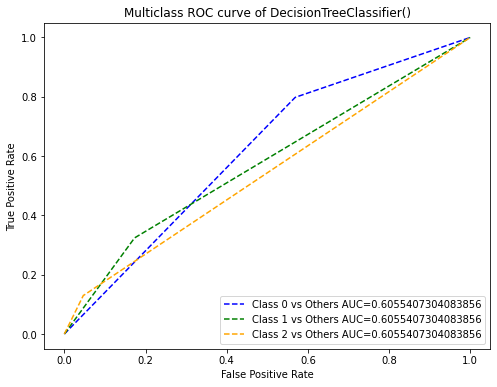



--------------Results ---------------

Training Accuracy:  0.9993925517499183
Test Accuracy:  0.6964058880669506
Train Recall:  0.9993925517499183
Test Recall:  0.6964058880669506
Train Precision:  0.9993930977674399
Test Precision:  0.7260423578625471
Train F1:  0.9993925857145509
Test F1:  0.7101192680859937
Train Auc:  0.9999996085358729
Test Auc:  0.6055407304083856


In [67]:
#Training and Evaluating Decision tree with Smote data
train_evaluate(DecisionTreeClassifier(),x_smote,y_smote,"SMOTE")

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[8182 1438 1080]
 [ 778  726  704]
 [ 105  139  231]]


Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     10700
           1       0.32      0.33      0.32      2208
           2       0.11      0.49      0.19       475

    accuracy                           0.68     13383
   macro avg       0.44      0.53      0.45     13383
weighted avg       0.78      0.68      0.72     13383



ROC Curve 



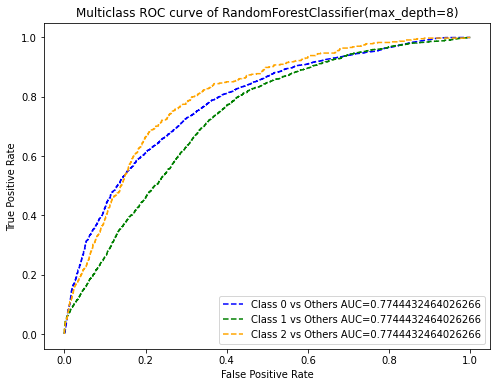



--------------Results ---------------

Training Accuracy:  0.6141223930345934
Test Accuracy:  0.6828812672793843
Train Recall:  0.6141223930345934
Test Recall:  0.6828812672793843
Train Precision:  0.6072965231163179
Test Precision:  0.7777213446254932
Train F1:  0.6000551286586583
Test F1:  0.7216374882068751
Train Auc:  0.7996775615425402
Test Auc:  0.7744432464026266


In [68]:
#Training and Evaluating Random forest with Smote data
train_evaluate(RandomForestClassifier(max_depth=8),x_smote,y_smote,"SMOTE")

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[8388 1258 1054]
 [ 851  706  651]
 [ 132  130  213]]


Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     10700
           1       0.34      0.32      0.33      2208
           2       0.11      0.45      0.18       475

    accuracy                           0.70     13383
   macro avg       0.45      0.52      0.45     13383
weighted avg       0.78      0.70      0.73     13383



ROC Curve 



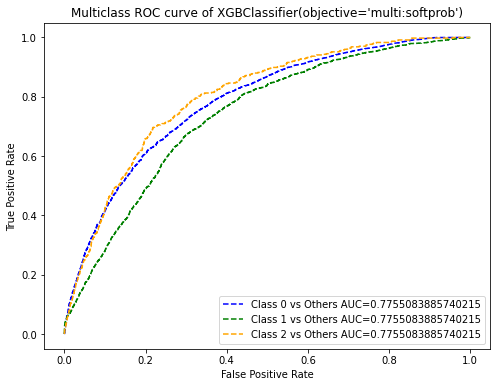



--------------Results ---------------

Training Accuracy:  0.6141846954192172
Test Accuracy:  0.6954345064634238
Train Recall:  0.6141846954192172
Test Recall:  0.6954345064634238
Train Precision:  0.6038310838925085
Test Precision:  0.7752205207622588
Train F1:  0.6006764789696261
Test F1:  0.7287363468433661
Train Auc:  0.8066288525001838
Test Auc:  0.7755083885740215


In [69]:
#Training and Evaluating Extreme gradient boost with Smote data
train_evaluate(XGBClassifier(),x_smote,y_smote,"SMOTE")

## **Comparision Dataframe**

In [70]:
metrics_df(model_list,all_metrics)

,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
SVC_RUS,0.557956,0.606516,0.557956,0.606516,0.547905,0.773601,0.540924,0.669058,0.744245,0.760538
KNeighborsClassifier_RUS,0.655954,0.589180,0.655954,0.589180,0.655543,0.755177,0.653342,0.650410,0.846322,0.700228
LogisticRegression_RUS,0.542677,0.614586,0.542677,0.614586,0.529114,0.773559,0.520042,0.674274,0.728297,0.767233
DecisionTreeClassifier_RUS,0.999298,0.496152,0.999298,0.496152,0.999298,0.745632,0.999297,0.577121,0.999999,0.615793
RandomForestClassifier_RUS,0.597647,0.641485,0.597647,0.641485,0.593461,0.778300,0.583519,0.694089,0.796860,0.772924
XGBClassifier_RUS,0.584826,0.637749,0.584826,0.637749,0.576263,0.777681,0.571862,0.691051,0.772044,0.776486
DecisionTreeClassifier_Tuned_RUS,0.574816,0.568408,0.574816,0.568408,0.571088,0.775995,0.571148,0.638931,0.763939,0.748349
RandomForestClassifier_Tuned_RUS,0.586055,0.632668,0.586055,0.632668,0.579320,0.775938,0.573337,0.687387,0.786586,0.772262
XGBClassifier_Tuned_RUS,0.682824,0.612195,0.682824,0.612195,0.682501,0.776953,0.678225,0.673046,0.859938,0.770329
KNeighborsClassifier_SMOTE,0.884857,0.599940,0.884857,0.599940,0.892646,0.749648,0.882466,0.655359,0.984164,0.684333


### As we have discussed before, Considering the performance of the decision tree on train and test data we can say that the decision tree is also overfitting the smote data.

### Even though the test_Auc scores are almost equal for both Random Undersampled data and Smote data.We can observe that the models which trained on Smote data have a little bit high test_f1 score when compared with the models trained on Random Undersampled data.


## **Hyperparameter Tuning SMOTE**

In [71]:
#Creating seperate dictionaries containing values of parameters for each model for Smote data
randomforest_params = {"n_estimators":[50,100,200],'max_depth':[4,6,8],'min_samples_split': [10,20,30],'min_samples_leaf': [20,30]}
Xgboost_params = {"n_estimators":[50,80,100],'max_depth':[5,6,8],'min_samples_leaf': [10,15,20],'min_samples_split': [15,20,25]}
Decision_params= {'max_depth':[None,10,20,25],'min_samples_leaf': [None,20,30,40],'min_samples_split': [30,40,50],'criterion': ["gini",'entropy']}

### **RandomizedSearch**

DecisionTreeClassifier()


Best_Estimator :  DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30,
                       min_samples_split=40)
Best_Parameters :  {'min_samples_split': 40, 'min_samples_leaf': 30, 'max_depth': None, 'criterion': 'entropy'}


Test Results ---------------------------

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[8974 1260  466]
 [1203  715  290]
 [ 193  186   96]]


Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     10700
           1       0.33      0.32      0.33      2208
           2       0.11      0.20      0.14       475

    accuracy                           0.73     13383
   macro avg       0.44      0.45      0.44     13383
weighted avg       0.75      0.73      0.74     13383



ROC Curve 



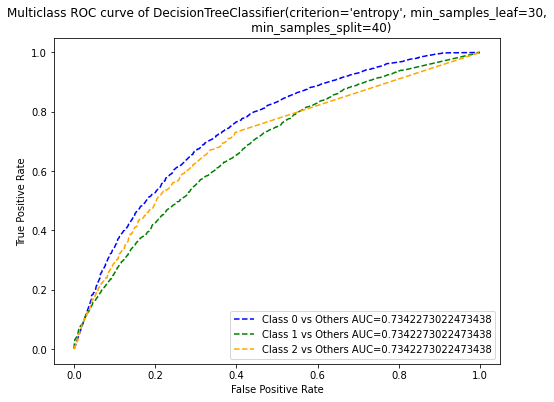



--------------Results ---------------

Training Accuracy:  0.7582433842655327
Test Accuracy:  0.7311514608084884
Train Recall:  0.7582433842655327
Test Recall:  0.7311514608084884
Train Precision:  0.7551314936479855
Test Precision:  0.7504780315981715
Train F1:  0.7555155638388651
Test F1:  0.7401905131225982
Train Auc:  0.9150699186080598
Test Auc:  0.7342273022473438


In [72]:
#Tuning the parameters for Decision tree using Smote data
tuned(DecisionTreeClassifier(),Decision_params,x_smote,y_smote,RandomizedSearchCV,"Tuned_SMOTE")

RandomForestClassifier()


Best_Estimator :  RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=30,
                       n_estimators=200)
Best_Parameters :  {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 8}


Test Results ---------------------------

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[8163 1446 1091]
 [ 783  721  704]
 [ 102  139  234]]


Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     10700
           1       0.31      0.33      0.32      2208
           2       0.12      0.49      0.19       475

    accuracy                           0.68     13383
   macro avg       0.44      0.53      0.44     13383
weighted avg       0.78      0.68      0.72     13383



ROC Curve 



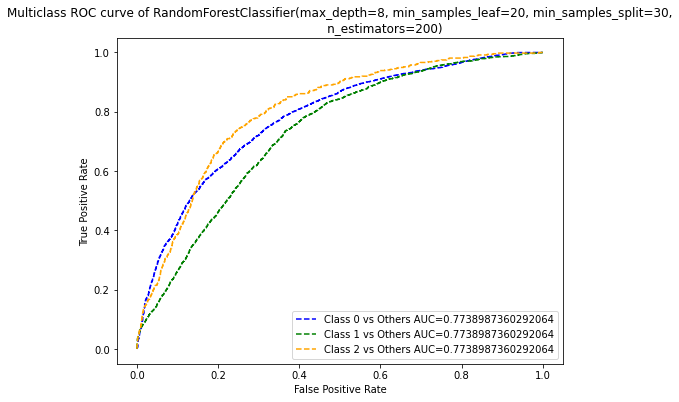



--------------Results ---------------

Training Accuracy:  0.6116848122361883
Test Accuracy:  0.6813121123813793
Train Recall:  0.6116848122361883
Test Recall:  0.6813121123813793
Train Precision:  0.6040454089952958
Test Precision:  0.7769972997694456
Train F1:  0.5985150606417444
Test F1:  0.7203162827435006
Train Auc:  0.7988186462168237
Test Auc:  0.7738987360292064


In [73]:
#Tuning the parameters for Random Forest using Smote data
tuned(RandomForestClassifier(),randomforest_params,x_smote,y_smote,RandomizedSearchCV,"Tuned_SMOTE")

XGBClassifier()


Best_Estimator :  XGBClassifier(max_depth=8, min_samples_leaf=15, min_samples_split=20,
              objective='multi:softprob')
Best_Parameters :  {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 8}


Test Results ---------------------------

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[9632  854  214]
 [1311  706  191]
 [ 216  187   72]]


Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10700
           1       0.40      0.32      0.36      2208
           2       0.15      0.15      0.15       475

    accuracy                           0.78     13383
   macro avg       0.47      0.46      0.46     13383
weighted avg       0.76      0.78      0.77     13383



ROC Curve 



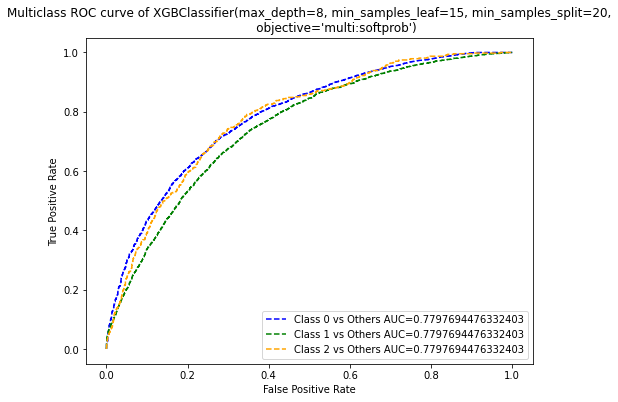



--------------Results ---------------

Training Accuracy:  0.7953911810974565
Test Accuracy:  0.7778524994395876
Train Recall:  0.7953911810974565
Test Recall:  0.7778524994395876
Train Precision:  0.7948885373243361
Test Precision:  0.7621465827042063
Train F1:  0.7891761343854972
Test F1:  0.7688773976528556
Train Auc:  0.9279713560820195
Test Auc:  0.7797694476332403


In [74]:
#Tuning the parameters for Xgboost using Smote data
tuned(XGBClassifier(),Xgboost_params,x_smote,y_smote,RandomizedSearchCV,"Tuned_SMOTE")

### After observing the results, The best models we got so far after tuning are XGBoost_Smote  and RandomForest_Smote. As XGboost is performing slighlty better Random Forest, we try tuning with GridSearch and see if we can improve the model.

## **GridSearch**

DecisionTreeClassifier()


Best_Estimator :  DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=30)
Best_Parameters :  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 30}


Test Results ---------------------------

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[8905 1260  535]
 [1191  700  317]
 [ 197  181   97]]


Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10700
           1       0.33      0.32      0.32      2208
           2       0.10      0.20      0.14       475

    accuracy                           0.72     13383
   macro avg       0.43      0.45      0.44     13383
weighted avg       0.75      0.72      0.74     13383



ROC Curve 



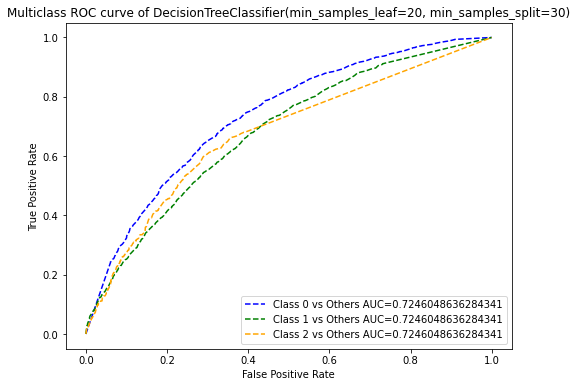



--------------Results ---------------

Training Accuracy:  0.786006884413501
Test Accuracy:  0.7249495628782784
Train Recall:  0.786006884413501
Test Recall:  0.7249495628782784
Train Precision:  0.7840183635692954
Test Precision:  0.749276936779898
Train F1:  0.7841592436905129
Test F1:  0.7362430767548367
Train Auc:  0.9325005659190281
Test Auc:  0.7246048636284341


In [75]:
#Tuning the parameters for Decision tree using Smote data
tuned(DecisionTreeClassifier(),Decision_params,x_smote,y_smote,GridSearchCV,"Grid_Tuned_SMOTE")

RandomForestClassifier()


Best_Estimator :  RandomForestClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=30,
                       n_estimators=200)
Best_Parameters :  {'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 200}


Test Results ---------------------------

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[8166 1440 1094]
 [ 784  712  712]
 [ 102  137  236]]


Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     10700
           1       0.31      0.32      0.32      2208
           2       0.12      0.50      0.19       475

    accuracy                           0.68     13383
   macro avg       0.44      0.53      0.44     13383
weighted avg       0.78      0.68      0.72     13383



ROC Curve 



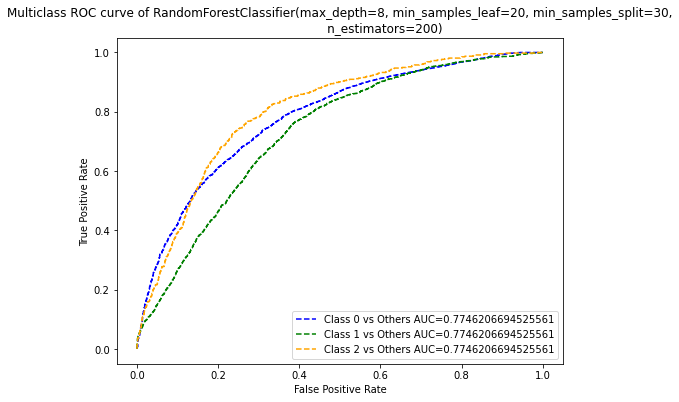



--------------Results ---------------

Training Accuracy:  0.6127906795632603
Test Accuracy:  0.6810132257341404
Train Recall:  0.6127906795632603
Test Recall:  0.6810132257341404
Train Precision:  0.605156415109004
Test Precision:  0.7766866483421422
Train F1:  0.598644570757614
Test F1:  0.7199862959031983
Train Auc:  0.7983705978288694
Test Auc:  0.7746206694525561


In [76]:
#Tuning the parameters for Random Forest using Smote data
tuned(RandomForestClassifier(),randomforest_params,x_smote,y_smote,GridSearchCV,"Grid_Tuned_SMOTE")

In [77]:
metrics_df(model_list,all_metrics)

,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
SVC_RUS,0.557956,0.606516,0.557956,0.606516,0.547905,0.773601,0.540924,0.669058,0.744245,0.760538
KNeighborsClassifier_RUS,0.655954,0.589180,0.655954,0.589180,0.655543,0.755177,0.653342,0.650410,0.846322,0.700228
LogisticRegression_RUS,0.542677,0.614586,0.542677,0.614586,0.529114,0.773559,0.520042,0.674274,0.728297,0.767233
DecisionTreeClassifier_RUS,0.999298,0.496152,0.999298,0.496152,0.999298,0.745632,0.999297,0.577121,0.999999,0.615793
RandomForestClassifier_RUS,0.597647,0.641485,0.597647,0.641485,0.593461,0.778300,0.583519,0.694089,0.796860,0.772924
XGBClassifier_RUS,0.584826,0.637749,0.584826,0.637749,0.576263,0.777681,0.571862,0.691051,0.772044,0.776486
DecisionTreeClassifier_Tuned_RUS,0.574816,0.568408,0.574816,0.568408,0.571088,0.775995,0.571148,0.638931,0.763939,0.748349
RandomForestClassifier_Tuned_RUS,0.586055,0.632668,0.586055,0.632668,0.579320,0.775938,0.573337,0.687387,0.786586,0.772262
XGBClassifier_Tuned_RUS,0.682824,0.612195,0.682824,0.612195,0.682501,0.776953,0.678225,0.673046,0.859938,0.770329
KNeighborsClassifier_SMOTE,0.884857,0.599940,0.884857,0.599940,0.892646,0.749648,0.882466,0.655359,0.984164,0.684333


### Evaluation Metrics:

###There are many model evaluation metrics to choose from but, since our dataset was highly imbalanced, it is critical to understand which metric should we consider to understand the model performance.

###Accuracy- Accuracy measures how often the classifier correctly predicts. We can define accuracy as the ratio of number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation of the majority class, we are going to get pretty high accuracy.

###Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

###Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

###Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we are able to predict correctly with our model.

###F1 Score - It's the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

###AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes, and when it's closer to 1, the better it becomes in distinguishing them.

### We have a multiclass classification problem, where the main objective is to track and classify between ignored, read and acknowledged classes.

### When we have a high class imbalance, we'll choose the F1 and Auc scores. A high F1 score considers both precision and recall, and The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.



In [78]:
# storing all the metrics in metrics_df dataframe
metrics_df=metrics_df(model_list,all_metrics)

In [79]:
# Visualizing last 9 rows of the comparision dataframe
metrics_df[9:]

,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
KNeighborsClassifier_SMOTE,0.884857,0.599940,0.884857,0.599940,0.892646,0.749648,0.882466,0.655359,0.984164,0.684333
LogisticRegression_SMOTE,0.536353,0.621908,0.536353,0.621908,0.520683,0.773650,0.511571,0.679093,0.725135,0.768528
DecisionTreeClassifier_SMOTE,0.999393,0.696406,0.999393,0.696406,0.999393,0.726042,0.999393,0.710119,1.000000,0.605541
RandomForestClassifier_SMOTE,0.614122,0.682881,0.614122,0.682881,0.607297,0.777721,0.600055,0.721637,0.799678,0.774443
XGBClassifier_SMOTE,0.614185,0.695435,0.614185,0.695435,0.603831,0.775221,0.600676,0.728736,0.806629,0.775508
DecisionTreeClassifier_Tuned_SMOTE,0.758243,0.731151,0.758243,0.731151,0.755131,0.750478,0.755516,0.740191,0.915070,0.734227
RandomForestClassifier_Tuned_SMOTE,0.611685,0.681312,0.611685,0.681312,0.604045,0.776997,0.598515,0.720316,0.798819,0.773899
XGBClassifier_Tuned_SMOTE,0.795391,0.777852,0.795391,0.777852,0.794889,0.762147,0.789176,0.768877,0.927971,0.779769
DecisionTreeClassifier_Grid_Tuned_SMOTE,0.786007,0.724950,0.786007,0.724950,0.784018,0.749277,0.784159,0.736243,0.932501,0.724605
RandomForestClassifier_Grid_Tuned_SMOTE,0.612791,0.681013,0.612791,0.681013,0.605156,0.776687,0.598645,0.719986,0.798371,0.774621


In [80]:
# Resetting the index of the dataframe
metrics_df=metrics_df.reset_index()
# Renaming the column named 'index' to 'Model_name'
metrics_df=metrics_df.rename(columns={'index':"Model_name"})

In [81]:
# Creating seperate dataframes for metrics obtained from RUS and Smote data
metrics_df_rus=metrics_df[:9] #Extracting the rows from metrics_df dataframe corresponding to RUS data
metrics_df_smt=metrics_df[9:] #Extracting the rows from metrics_df dataframe corresponding to RUS data

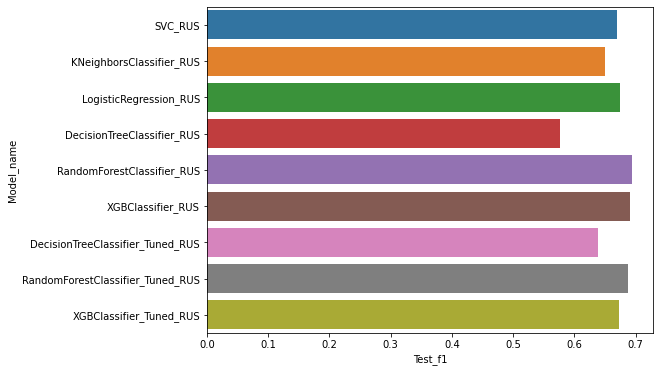

In [82]:
#Comparing the Test_f1 score of all the models which are trained on RUS data
plt.figure(figsize=(8,6))
sns.barplot(y=metrics_df_rus["Model_name"], x = metrics_df_rus['Test_f1'],hue_order=metrics_df_rus['Test_f1'])
plt.show()

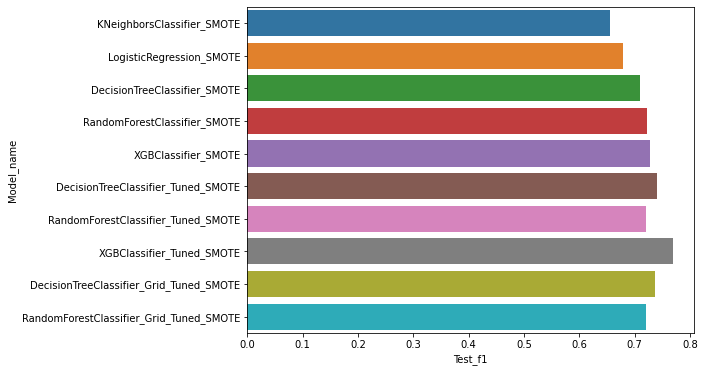

In [83]:
#Comparing the Test_f1 score of all the models which are trained on Smote data
plt.figure(figsize=(8,6))
sns.barplot(y=metrics_df_smt["Model_name"], x = metrics_df_smt['Test_f1'],hue_order=metrics_df_smt['Test_f1'])
plt.show()

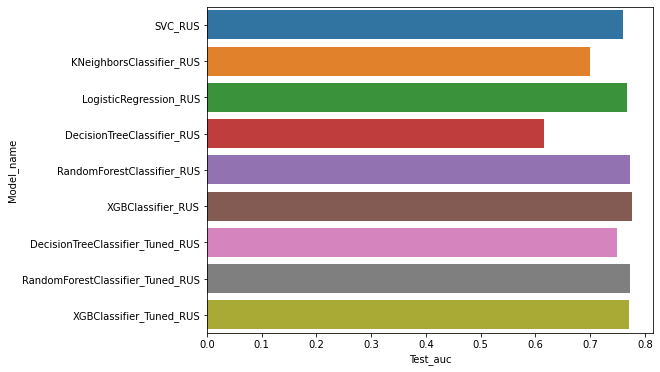

In [84]:
#Comparing the Test_auc score of all the models which are trained on RUS data
plt.figure(figsize=(8,6))
sns.barplot(y=metrics_df_rus["Model_name"], x = metrics_df_rus['Test_auc'],hue_order=metrics_df_rus['Test_auc'])
plt.show()

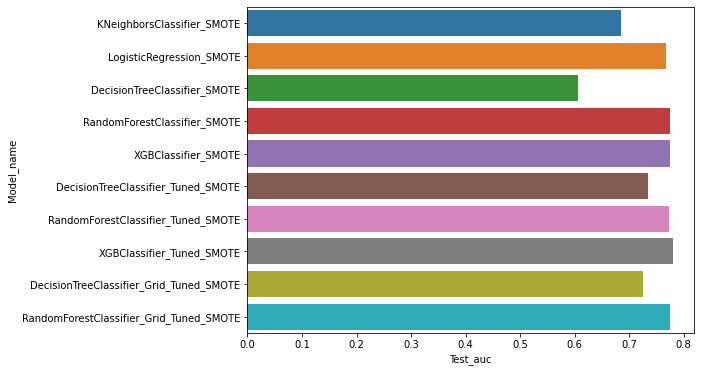

In [85]:
#Comparing the Test_auc score of all the models which are trained on Smote data
plt.figure(figsize=(8,6))
sns.barplot(y=metrics_df_smt["Model_name"], x = metrics_df_smt['Test_auc'],hue_order=metrics_df_smt['Test_auc'])
plt.show()

In [86]:
#Top five models with highest Test_auc and Test_f1 scores
# Sorting the metrics_df dataframe based on Test_auc and Test_f1
metrics_df.sort_values(by=['Test_auc','Test_f1'], ascending=(False,False), inplace = True, ignore_index = True)
metrics_df.head(5)

,Model_name,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
0,XGBClassifier_Tuned_SMOTE,0.795391,0.777852,0.795391,0.777852,0.794889,0.762147,0.789176,0.768877,0.927971,0.779769
1,XGBClassifier_RUS,0.584826,0.637749,0.584826,0.637749,0.576263,0.777681,0.571862,0.691051,0.772044,0.776486
2,XGBClassifier_SMOTE,0.614185,0.695435,0.614185,0.695435,0.603831,0.775221,0.600676,0.728736,0.806629,0.775508
3,RandomForestClassifier_Grid_Tuned_SMOTE,0.612791,0.681013,0.612791,0.681013,0.605156,0.776687,0.598645,0.719986,0.798371,0.774621
4,RandomForestClassifier_SMOTE,0.614122,0.682881,0.614122,0.682881,0.607297,0.777721,0.600055,0.721637,0.799678,0.774443


## **Final Model**

## XGBoost

In [87]:
#Fitting XGboost with the best parameters from RandomisedSearch
XGB=XGBClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=25,objective='multi:softprob')
XGB=XGB.fit(x_smote,y_smote)

In [88]:
#Calculating feature importances
XGB.feature_importances_

array([0.02625256, 0.04293781, 0.01455642, 0.16544698, 0.5743265 ,
       0.01980598, 0.04727684, 0.02585929, 0.04128883, 0.01349473,
       0.01273856, 0.01601545], dtype=float32)

In [89]:
XGB.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'min_samples_leaf': 20,
 'min_samples_split': 25}

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[9632  854  214]
 [1311  706  191]
 [ 216  187   72]]


Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10700
           1       0.40      0.32      0.36      2208
           2       0.15      0.15      0.15       475

    accuracy                           0.78     13383
   macro avg       0.47      0.46      0.46     13383
weighted avg       0.76      0.78      0.77     13383



ROC Curve 



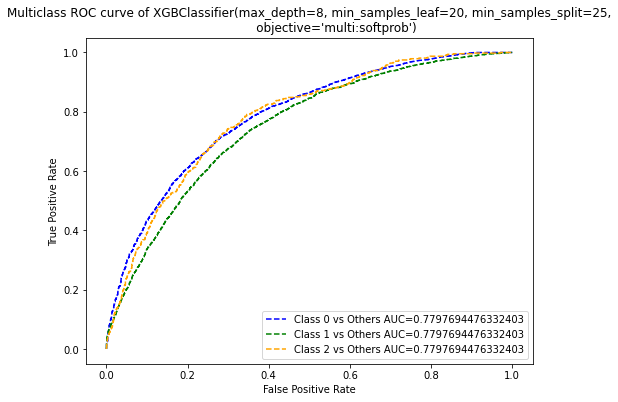



--------------Results ---------------

Training Accuracy:  0.7953911810974565
Test Accuracy:  0.7778524994395876
Train Recall:  0.7953911810974565
Test Recall:  0.7778524994395876
Train Precision:  0.7948885373243361
Test Precision:  0.7621465827042063
Train F1:  0.7891761343854972
Test F1:  0.7688773976528556
Train Auc:  0.9279713560820195
Test Auc:  0.7797694476332403


In [90]:
# Calling evaluate function for model evaluation
evaluate(XGB,x_smote,y_smote,x_test)

In [91]:
#feature importance by Xgboost
feature_imp = pd.DataFrame({"Variable": x.columns,"Importance": XGB.feature_importances_}) #Creating a datframe to store the feature importances
feature_imp.sort_values(by="Importance", ascending=False, inplace = True) #Sorting in descending order

In [92]:
feature_imp

,Variable,Importance
4,Email_Campaign_Type_2,0.574327
3,Email_Campaign_Type_1,0.165447
6,Total_Past_Communications,0.047277
1,Subject_Hotness_Score,0.042938
8,Links_Images,0.041289
0,Email_Type_1,0.026253
7,Word_Count,0.025859
5,Email_Campaign_Type_3,0.019806
11,Time_Email_sent_Category_3,0.016015
2,Email_Source_Type_1,0.014556


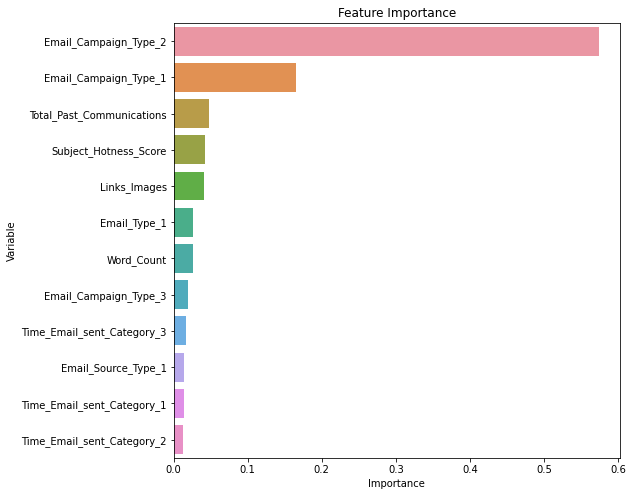

In [93]:
# Compring the feature importances using Horizontal bar plot
plt.figure(figsize=(8,8))
plt.title("Feature Importance")
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable']) #Using seaborn's barplot for visualization
plt.show()

# **Inferences and Conclusion**

## **EDA**

### • We found that the percentage ratio of emails being ignored, read, and acknowledged are kind of similar and are irrespective of the location. Depending on the customers location, we cannot say that an email can be ignored, read, or acknowledged.

### • In EDA, we observed that the Email_campaign_type was the most important feature. Even though there are very few emails sent from Email_campaign type 1 there is a very high possibility of getting read.

### • Most emails were sent from Email_campaign 2 and most were ignored and Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

### • As the word_count increases beyond the 600 mark we see that there is a high possibility of that email getting ignored. The ideal mark is 400-600.No one is interested in reading long emails.

### • We can see that the more the number of Total past communications, the more it leads to reading and acknowledging emails. Therefore, having a healthy relationship with customers is a big yes.

## **Modelling**

###Imbalanced Class Handling techniques such as Undersampling and SMOTE were done after train-test split only on the training data, to make sure that the model doesn't catch up to the test set at all.

###It is observed that SMOTE worked considerably better than Random Undersampling, maybe led to loss of information.

## **Evaluation**

###Decision Tree Model is overfitting both UnderSampled and Smote data. It is working really great on train data and worse on test data.but after hyperparameter tuning we avoided the problem of overfitting.

### Hyperparameter tuning isn't improving the results to a great degree.

### XGBoost Algorithm worked better with imbalanced data with F1 Score of 0.77 and Auc Score of 0.78 on the test set followed by Random Forest Hyperparameter Tuned model.

### It is observed that the Email_campaign_type and Total_past_communication are the most important features in determining whether the email is ignored, read or acknowledged. 

# **--------------------------------------------- Thank You**---------------------------------------------------------